# Pharma Lab (Discrete Distributions)

**Learning Objectives:**
  * Practice basic statistical analysis with Pandas
  * Gain exposure to healthcare related DataSets

## Context of the dataset

### 1. The dataset is consisted of records corresponding to pharma transactions.
### 2. Each transaction is uniquely identified by `TransactionId`.
### 3. Several transactions can take place in a single `TicketNumber`.

## 1. Library Import

In [2]:
import pandas as pd
import warnings
import numpy as np

In [3]:
warnings.simplefilter('ignore')

## 2. Data loading and DataFrame creation

In [4]:
PharmaDataSet=pd.read_csv("https://github.com/thousandoaks/Python4DS-I/raw/main/datasets/PharmaDataSet.csv.zip",sep=',',parse_dates=['Date'])

In [5]:
PharmaDataSet.head(10)

,TransactionId,Date,Pharmacist,ItemId,ItemDescription,TicketNumber,Units,SellingPrice
0,172865,2019-01-01 10:47:41,dc0d3ee6,90,PLASTICO,0,1,0.060
1,172868,2019-01-01 10:47:41,dc0d3ee6,809459,POLARAMINE 2 MG 20 COMPRIMIDOS,0,1,4.008
2,172867,2019-01-01 10:47:41,dc0d3ee6,835454,EBASTEL FORTE FLAS 20 MG 20 LIOFILIZADOS ORALES,0,1,10.548
3,172866,2019-01-01 10:47:41,dc0d3ee6,995233,DACORTIN 30 MG 30 COMPRIMIDOS,0,1,4.512
4,172864,2019-01-01 11:07:21,dc0d3ee6,662042,PARACETAMOL VIATRIS EFG 1 G 40 COMPRIMIDOS,1,1,3.000
5,172862,2019-01-01 11:07:21,dc0d3ee6,656456,ACETILCISTEINA KERN PHARMA EFG 600 MG 20 COMPR...,1,1,4.932
6,172863,2019-01-01 11:07:21,dc0d3ee6,663526,NASONEX 50 MICROGRAMOS/PULVERIZACION SUSPENSIO...,1,1,10.788
7,172861,2019-01-01 11:28:11,dc0d3ee6,662585,"DUROGESIC MATRIX 50 MICROGRAMOS/H (3,6 MG/3 DI...",2,1,35.100
8,172858,2019-01-01 11:32:03,dc0d3ee6,656706,VENTOLIN 100 MICROGRAMOS/INHALACION SUSPENSION...,3,1,3.108
9,172860,2019-01-01 11:32:03,dc0d3ee6,400086,PROCHAMBER CAMARA DE INHALACION,3,1,8.736


In [6]:
PharmaDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759806 entries, 0 to 759805
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   TransactionId    759806 non-null  int64         
 1   Date             759806 non-null  datetime64[ns]
 2   Pharmacist       759806 non-null  object        
 3   ItemId           759806 non-null  int64         
 4   ItemDescription  759806 non-null  object        
 5   TicketNumber     759806 non-null  int64         
 6   Units            759806 non-null  int64         
 7   SellingPrice     759806 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 46.4+ MB


## 3. Basic Statistical Analysis
### In this section we will try to gather information on the distribution of:
#### (1) Number of Items sold in each customer visit
#### (2) Number of customer visits  per working hour

In [9]:
PharmaDataSet.head(100)

,TransactionId,Date,Pharmacist,ItemId,ItemDescription,TicketNumber,Units,SellingPrice
0,172865,2019-01-01 10:47:41,dc0d3ee6,90,PLASTICO,0,1,0.060
1,172868,2019-01-01 10:47:41,dc0d3ee6,809459,POLARAMINE 2 MG 20 COMPRIMIDOS,0,1,4.008
2,172867,2019-01-01 10:47:41,dc0d3ee6,835454,EBASTEL FORTE FLAS 20 MG 20 LIOFILIZADOS ORALES,0,1,10.548
3,172866,2019-01-01 10:47:41,dc0d3ee6,995233,DACORTIN 30 MG 30 COMPRIMIDOS,0,1,4.512
4,172864,2019-01-01 11:07:21,dc0d3ee6,662042,PARACETAMOL VIATRIS EFG 1 G 40 COMPRIMIDOS,1,1,3.000
...,...,...,...,...,...,...,...,...
95,172764,2019-01-01 19:04:05,eec61f75,770370,ALGIDOL 20 SOBRES GRANULADO PARA SOLUCION ORAL,49,1,3.744
96,172763,2019-01-01 19:04:05,eec61f75,969659,ZOVIRAX 50 MG/G CREMA 1 TUBO 2 G,49,1,5.148
97,172765,2019-01-01 19:04:05,eec61f75,803478,AMOXICILINA SANDOZ EFG 250 MG/5 ML POLVO PARA ...,49,1,2.748
98,172762,2019-01-01 19:06:12,eec61f75,721951,AZITROMICINA CINFA EFG 500 MG 3 COMPRIMIDOS RE...,50,1,6.744


#### 3.1 Number of Items sold in each customer visit

In [13]:
TicketNumberCounts=PharmaDataSet.groupby('TicketNumber')['TransactionId'].count()
TicketNumberCounts

TicketNumber
0         4
1         3
2         1
3         4
4         2
         ..
391573    1
391574    1
391575    1
391576    5
391577    3
Name: TransactionId, Length: 373813, dtype: int64

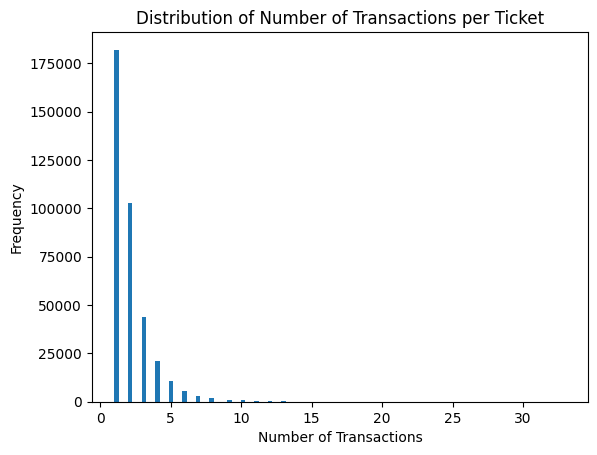

In [18]:
# prompt: plot the distribution of the previous DataFrame

import matplotlib.pyplot as plt

TicketNumberCounts.plot(kind='hist', bins=100)
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Transactions per Ticket')
plt.show()


In [19]:
TicketNumberCounts.mean()

2.03258313648803

In [20]:
TicketNumberCounts.var()

2.396961941825238

### Based on the previous plot, the observed mean (2.032) and observed variance (2.39) we can safely asume that the Number of Items sold in each customer visit follows a Poisson Distribution with parameter 2.032

#### 3.2 Number of customer visits  per working hour

In [25]:
PharmaDataSet.sort_values(by='Date').head(10)

,TransactionId,Date,Pharmacist,ItemId,ItemDescription,TicketNumber,Units,SellingPrice
0,172865,2019-01-01 10:47:41,dc0d3ee6,90,PLASTICO,0,1,0.060
1,172868,2019-01-01 10:47:41,dc0d3ee6,809459,POLARAMINE 2 MG 20 COMPRIMIDOS,0,1,4.008
2,172867,2019-01-01 10:47:41,dc0d3ee6,835454,EBASTEL FORTE FLAS 20 MG 20 LIOFILIZADOS ORALES,0,1,10.548
3,172866,2019-01-01 10:47:41,dc0d3ee6,995233,DACORTIN 30 MG 30 COMPRIMIDOS,0,1,4.512
4,172864,2019-01-01 11:07:21,dc0d3ee6,662042,PARACETAMOL VIATRIS EFG 1 G 40 COMPRIMIDOS,1,1,3.000
5,172862,2019-01-01 11:07:21,dc0d3ee6,656456,ACETILCISTEINA KERN PHARMA EFG 600 MG 20 COMPR...,1,1,4.932
6,172863,2019-01-01 11:07:21,dc0d3ee6,663526,NASONEX 50 MICROGRAMOS/PULVERIZACION SUSPENSIO...,1,1,10.788
7,172861,2019-01-01 11:28:11,dc0d3ee6,662585,"DUROGESIC MATRIX 50 MICROGRAMOS/H (3,6 MG/3 DI...",2,1,35.100
10,172859,2019-01-01 11:32:03,dc0d3ee6,933416,EFFERALGAN 1 G 20 COMPRIMIDOS EFERVESCENTES,3,1,3.000
11,172857,2019-01-01 11:32:03,dc0d3ee6,90,PLASTICO,3,1,0.060


In [38]:
TicketsSold=PharmaDataSet[['Date','TicketNumber']].drop_duplicates()
TicketsSold.head(300)

,Date,TicketNumber
0,2019-01-01 10:47:41,0
4,2019-01-01 11:07:21,1
7,2019-01-01 11:28:11,2
8,2019-01-01 11:32:03,3
12,2019-01-01 11:36:13,4
...,...,...
587,2019-01-03 19:02:30,306
588,2019-01-03 19:08:13,307
596,2019-01-03 19:10:02,308
597,2019-01-03 19:14:22,309


In [55]:
TicketsSoldPerHour=TicketsSold.resample(rule='1H',on='Date').count()
TicketsSoldPerHour.sample(50)

,TicketNumber
Date,
2021-12-09 11:00:00,26
2022-07-11 14:00:00,0
2019-11-11 16:00:00,7
2022-09-19 04:00:00,0
2023-03-13 23:00:00,0
2023-06-15 13:00:00,19
2019-03-06 22:00:00,0
2022-01-14 19:00:00,26
2023-04-17 00:00:00,0


In [56]:
## We remove those hours in which the pharmacy was closed
WorkingHoursFilter=TicketsSoldPerHour['TicketNumber']!=0

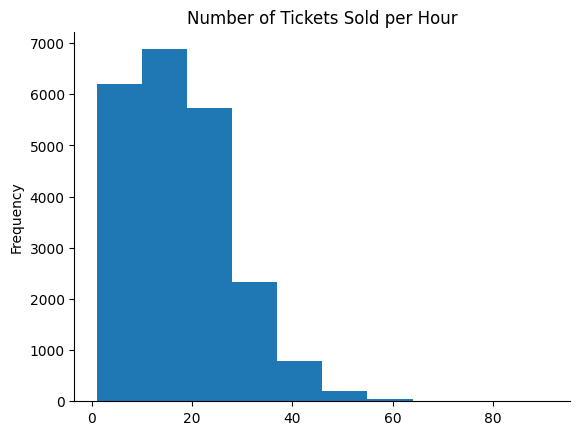

In [57]:


from matplotlib import pyplot as plt
TicketsSoldPerHour[WorkingHoursFilter]['TicketNumber'].plot(kind='hist', bins=10, title='Number of Tickets Sold per Hour')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [58]:
TicketsSoldPerHour[WorkingHoursFilter]['TicketNumber'].mean()

16.852616396989227

In [59]:
TicketsSoldPerHour[WorkingHoursFilter]['TicketNumber'].var()

113.29622535013769

### Based on the previous plot, the observed mean (16.85) and observed variance (113.29) we can not assume that the number of tickets sold any given hour follows a Poisson Distribution. The variance is not equal to the mean. A solution to this would be to asume alternative distributions (e.g. a Negative Binomial distribution)